# Import Library

In [1]:
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import os, shutil
import random
import seaborn as sns
from random import sample
import matplotlib.pyplot as plt
from shutil import copyfile
import pathlib
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq
import cv2
from PIL import Image
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,  ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras  import Model,layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer,Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten,Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
import warnings
from skimage import io
from collections import Counter
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

from keras.utils import to_categorical

In [3]:
from keras.layers import Conv2D, MaxPool2D, Flatten

In [4]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


# Read Image & Convert To Grayscale

In [5]:
def detect_face(img):
    img = img[70:195,78:172]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (50, 50))
    return img

In [6]:
def print_progress(val, val_len, folder, bar_size=20):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] (%d samples)\t label : %s \t\t" % (progr, val+1, folder), end="\r")

In [7]:
!unzip /content/Dataset.zip -d /content/Dataset/

Archive:  /content/Dataset.zip
   creating: /content/Dataset/Dataset/
   creating: /content/Dataset/Dataset/Unverified/
  inflating: /content/Dataset/Dataset/Unverified/Unverified_uji__1000.jpg  
  inflating: /content/Dataset/Dataset/Unverified/Unverified_uji__1001.jpg  
  inflating: /content/Dataset/Dataset/Unverified/Unverified_uji__1002.jpg  
  inflating: /content/Dataset/Dataset/Unverified/Unverified_uji__1003.jpg  
  inflating: /content/Dataset/Dataset/Unverified/Unverified_uji__1004.jpg  
  inflating: /content/Dataset/Dataset/Unverified/Unverified_uji__1005.jpg  
  inflating: /content/Dataset/Dataset/Unverified/Unverified_uji__1006.jpg  
  inflating: /content/Dataset/Dataset/Unverified/Unverified_uji__1007.jpg  
  inflating: /content/Dataset/Dataset/Unverified/Unverified_uji__1008.jpg  
  inflating: /content/Dataset/Dataset/Unverified/Unverified_uji__1009.jpg  
  inflating: /content/Dataset/Dataset/Unverified/Unverified_uji__1010.jpg  
  inflating: /content/Dataset/Dataset/Unveri

In [9]:
# Fungsi pendeteksi wajah sederhana (contoh)
def detect_face(img):
    try:
        img = img[70:195, 78:172]  # Crop wajah kasar
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (100, 100))
        return img
    except:
        return None

# Fungsi progress print
def print_progress(i, total, folder):
    print(f"Memproses {folder}: {i + 1}/{total}", end="\r")

# Path ke folder dataset
dataset_folder = "/content/Dataset/Dataset"

names = []
images = []

# Ekstensi gambar yang diperbolehkan
allowed_ext = [".jpg", ".jpeg", ".png"]

# Loop setiap folder dalam dataset
for folder in os.listdir(dataset_folder):
    folder_path = os.path.join(dataset_folder, folder)
    if not os.path.isdir(folder_path):
        continue  # Lewati jika bukan folder

    # Filter hanya file gambar
    files = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in allowed_ext]

    print(f"Folder '{folder}' memiliki {len(files)} file gambar.")

    if len(files) < 50:
        print(f"⚠️  Lewatkan folder '{folder}' karena kurang dari 50 gambar.\n")
        continue

    for i, name in enumerate(files[:2000]):  # Maksimal 2000 file
        img_path = os.path.join(folder_path, name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Gagal membaca gambar: {img_path}")
            continue

        img = detect_face(img)
        if img is not None:
            images.append(img)
            names.append(folder)

        print_progress(i, len(files), folder)

print("\n✅ Selesai memuat dataset.")
print(f"Total gambar berhasil diproses: {len(images)}")
print(f"Total label: {len(set(names))} kelas — {set(names)}")

Folder 'Verified' memiliki 1324 file gambar.
Folder 'Unverified' memiliki 1324 file gambar.
Memproses Unverified: 1324/1324
✅ Selesai memuat dataset.
Total gambar berhasil diproses: 2648
Total label: 2 kelas — {'Unverified', 'Verified'}


In [10]:
print("number of samples :", len(names))

number of samples : 2648


# Image Augmentation

In [11]:
def img_augmentation(img):
    h, w = img.shape
    center = (w // 2, h // 2)
    M_rot_5 = cv2.getRotationMatrix2D(center, 5, 1.0)
    M_rot_neg_5 = cv2.getRotationMatrix2D(center, -5, 1.0)
    M_rot_10 = cv2.getRotationMatrix2D(center, 10, 1.0)
    M_rot_neg_10 = cv2.getRotationMatrix2D(center, -10, 1.0)
    M_trans_3 = np.float32([[1, 0, 3], [0, 1, 0]])
    M_trans_neg_3 = np.float32([[1, 0, -3], [0, 1, 0]])
    M_trans_6 = np.float32([[1, 0, 6], [0, 1, 0]])
    M_trans_neg_6 = np.float32([[1, 0, -6], [0, 1, 0]])
    M_trans_y3 = np.float32([[1, 0, 0], [0, 1, 3]])
    M_trans_neg_y3 = np.float32([[1, 0, 0], [0, 1, -3]])
    M_trans_y6 = np.float32([[1, 0, 0], [0, 1, 6]])
    M_trans_neg_y6 = np.float32([[1, 0, 0], [0, 1, -6]])

    imgs = []
    imgs.append(cv2.warpAffine(img, M_rot_5, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_neg_5, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_10, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_neg_10, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_y3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_y3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_y6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_y6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.add(img, 10))
    imgs.append(cv2.add(img, 30))
    imgs.append(cv2.add(img, -10))
    imgs.append(cv2.add(img, -30))
    imgs.append(cv2.add(img, 15))
    imgs.append(cv2.add(img, 45))
    imgs.append(cv2.add(img, -15))
    imgs.append(cv2.add(img, -45))

    return imgs

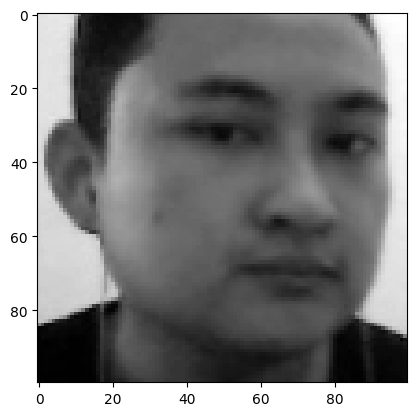

In [12]:
plt.imshow(images[699], cmap="gray")

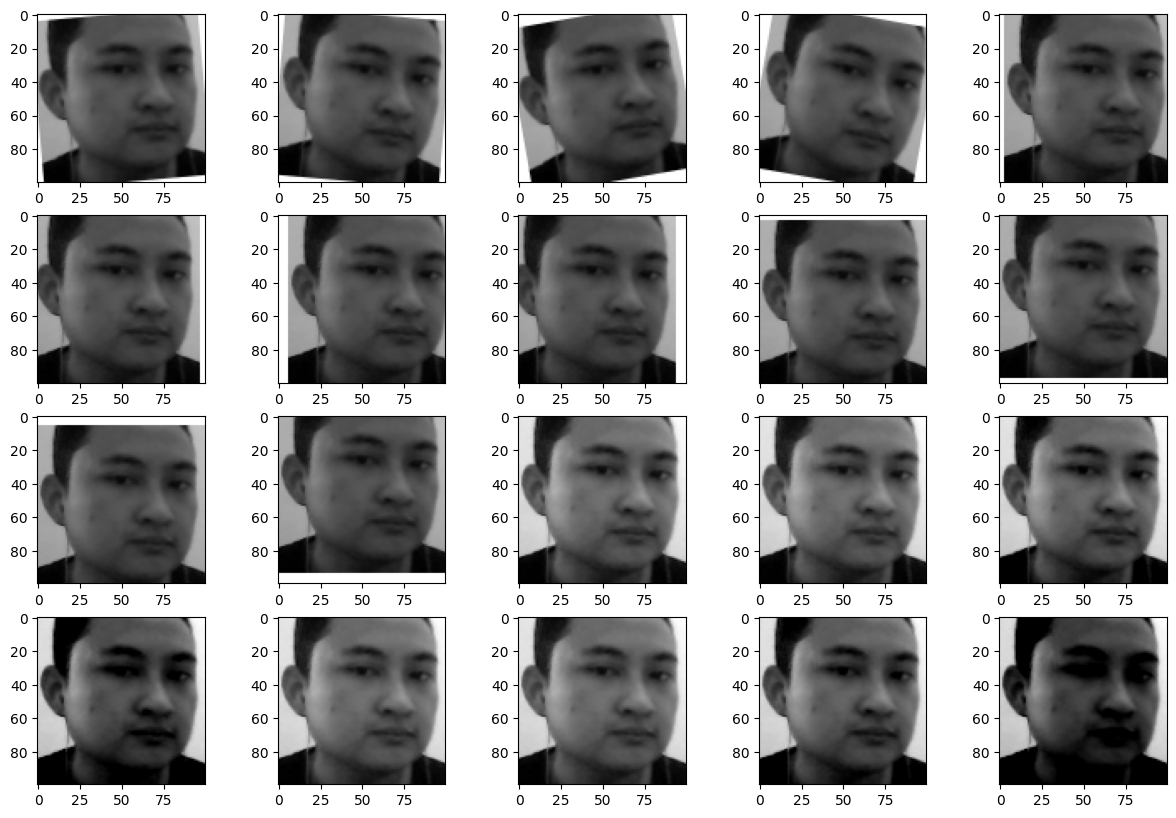

In [13]:
img_test = images[699]

augmented_image_test = img_augmentation(img_test)

plt.figure(figsize=(15,10))
for i, img in enumerate(augmented_image_test):
    plt.subplot(4,5,i+1)
    plt.imshow(img, cmap="gray")
plt.show()

In [14]:
augmented_images = []
augmented_names = []
for i, img in enumerate(images):
    try :
        augmented_images.extend(img_augmentation(img))
        augmented_names.extend([names[i]] * 20)
    except :
        print(i)

In [15]:
len(augmented_images), len(augmented_names)

(52960, 52960)

In [16]:
images.extend(augmented_images)
names.extend(augmented_names)

In [17]:
len(images), len(names)

(55608, 55608)

In [18]:
unique, counts = np.unique(names, return_counts = True)

for item in zip(unique, counts):
    print(item)

(np.str_('Unverified'), np.int64(27804))
(np.str_('Verified'), np.int64(27804))


# Balancing Data

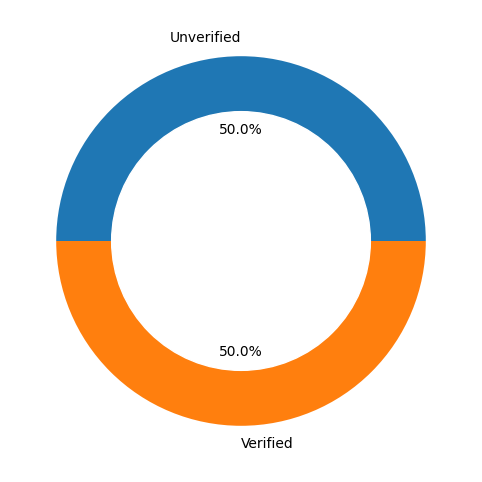

In [19]:
# preview data distribution

def print_data(label_distr, label_name):
    plt.figure(figsize=(12,6))

    my_circle = plt.Circle( (0,0), 0.7, color='white')
    plt.pie(label_distr, labels=label_name, autopct='%1.1f%%')
    plt.gcf().gca().add_artist(my_circle)
    plt.show()

unique = np.unique(names)
label_distr = {i:names.count(i) for i in names}.values()
print_data(label_distr, unique)

In [20]:
len(images), len(names)

(55608, 55608)

# Encoding Label & Categoricalization

In [21]:
le = LabelEncoder()

le.fit(names)

labels = le.classes_

name_vec = le.transform(names)

categorical_name_vec = to_categorical(name_vec)

In [22]:
print("number of class :", len(labels))
print(labels)

number of class : 2
['Unverified' 'Verified']


In [23]:
print(name_vec)

[1 1 1 ... 0 0 0]


In [24]:
print(categorical_name_vec)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Split Dataset

In [25]:
from sklearn.model_selection import train_test_split
import numpy as np

# Data input dan target
X = np.array(images, dtype=np.float32)
y = np.array(categorical_name_vec)

# 1. Bagi data menjadi: 85% (train+val) dan 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# 2. Bagi X_temp menjadi: 80% train dan 20% val (dari 85%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)
# (0.1765 * 85% ≈ 15% dari total, jadi proporsinya pas)

# ✅ Print hasil
print("Train     :", X_train.shape, y_train.shape)
print("Val       :", X_val.shape, y_val.shape)
print("Test      :", X_test.shape, y_test.shape)

Train     : (38923, 100, 100) (38923, 2)
Val       : (8343, 100, 100) (8343, 2)
Test      : (8342, 100, 100) (8342, 2)


# Reshape Data

In [27]:
# Reshape agar memiliki 1 channel (grayscale)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val   = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Konfirmasi bentuk
print("x_train shape:", X_train.shape)
print("x_val shape  :", X_val.shape)
print("x_test shape :", X_test.shape)

x_train shape: (38923, 100, 100, 1)
x_val shape  : (8343, 100, 100, 1)
x_test shape : (8342, 100, 100, 1)


# Arsitektur Model CNN

In [28]:
def cnn_model(input_shape):
    model = Sequential()

    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape=input_shape))
    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape=input_shape))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(len(labels)))  # equal to number of classes
    model.add(Activation("softmax"))

    model.summary()

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

In [29]:
X_train[0].shape

(100, 100, 1)

In [30]:
input_shape = X_train[0].shape

EPOCHS = 5
BATCH_SIZE = 32

model = cnn_model(input_shape)

history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    shuffle=True,
                    validation_split=0.15   # 15% of train dataset will be used as validation set
                    )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 44, 44, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,197,378 (31.27 MB)

 Trainable params: 8,197,378 (31.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 60s 50ms/step - accuracy: 0.8819 - loss: 1.6632 - val_accuracy: 0.9887 - val_loss: 0.0442
Epoch 2/5
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.9881 - loss: 0.0411 - val_accuracy: 0.9949 - val_loss: 0.0209
Epoch 3/5
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.9943 - loss: 0.0194 - val_accuracy: 0.9961 - val_loss: 0.0168
Epoch 4/5
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 45s 43ms/step - accuracy: 0.9965 - loss: 0.0121 - val_accuracy: 0.9954 - val_loss: 0.0247
Epoch 5/5
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9961 - loss: 0.0125 - val_accuracy: 0.9911 - val_loss: 0.0274


# Evaluate Model

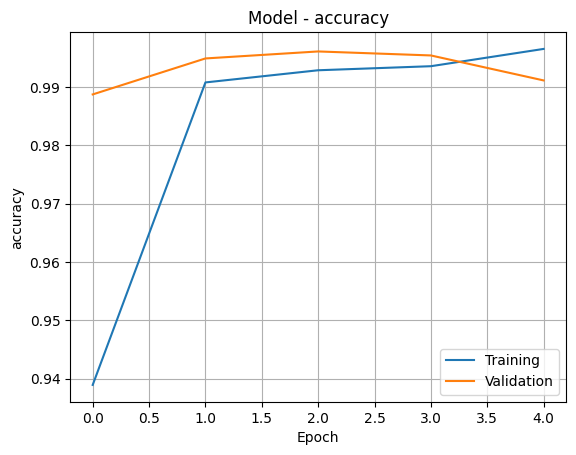

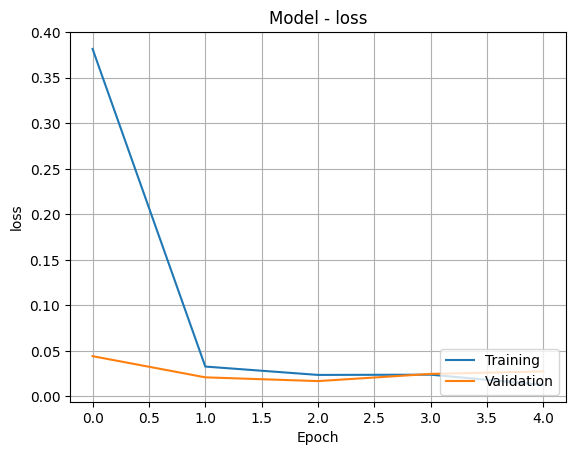

In [31]:
def evaluate_model_(history):
    names = [['accuracy', 'val_accuracy'],
             ['loss', 'val_loss']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.grid()
        plt.show()

evaluate_model_(history)

# Predict Data & Classification Report

In [33]:
# predict test data
y_pred=model.predict(X_test)

261/261 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


# Confusion Matrix

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

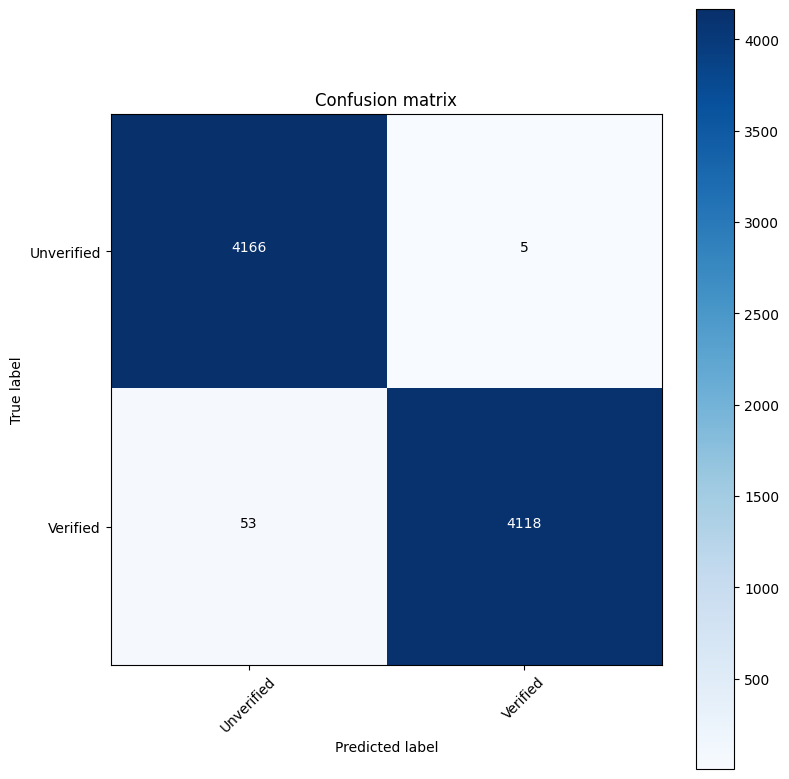

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix')

In [36]:
print(classification_report(y_test.argmax(axis=1),
                            y_pred.argmax(axis=1),
                            target_names=labels))

              precision    recall  f1-score   support

  Unverified       0.99      1.00      0.99      4171
    Verified       1.00      0.99      0.99      4171

    accuracy                           0.99      8342
   macro avg       0.99      0.99      0.99      8342
weighted avg       0.99      0.99      0.99      8342



# Model Save

In [37]:
model.save('/content/Wajah_Dataset.h5')

In [38]:
model.export('saved_model/my_model')

Saved artifact at 'saved_model/my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  137083706358480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137083706357904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137081929239440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137081929238288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137081929241168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137081929241936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137081929240976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137081929240592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137081929242704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137081929243856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1370819292

In [40]:
!tensorflowjs_converter --input_format=keras Wajah_Dataset.h5 tfjs_model

2025-04-21 12:12:25.034825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745237545.096559    6576 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745237545.121166    6576 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [41]:
saved_model_dir='/content/saved_model/my_model'

converter=tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model=converter.convert()

with open('model.tflite','wb') as f:
  f.write(tflite_model)

In [42]:
shutil.make_archive('/content/saved_model','zip','saved_model')

'/content/saved_model.zip'

In [43]:
shutil.make_archive('/content/tfjs_model','zip','tfjs_model')

'/content/tfjs_model.zip'

# Inference

Saving Unverified_uji__1294.jpg to Unverified_uji__1294.jpg
Prediksi pada gambar Unverified_uji__1294.jpg
Prediksi: Unverified


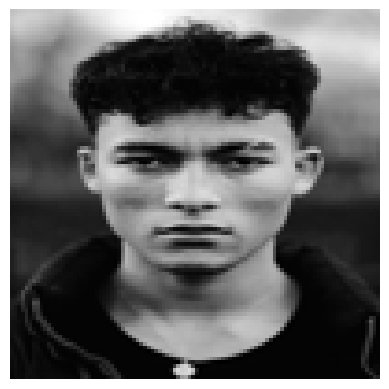

In [46]:
import tensorflow as tf
import numpy as np
import io
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Fungsi untuk memuat label
def load_labels(label_file):
    with open(label_file, 'r') as f:
        return [line.strip() for line in f.readlines()]

# Fungsi untuk memuat dan memproses gambar (mengonversi ke grayscale)
def load_image(image_bytes, input_size=(100, 100)):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.convert('L')  # Mengonversi gambar ke grayscale (1 channel)
    img = img.resize(input_size)
    img = np.array(img, dtype=np.float32)

    # Menambah dimensi batch dan normalisasi
    img = np.expand_dims(img, axis=-1)  # Membuat dimensi (100, 100, 1)
    img = np.expand_dims(img, axis=0)  # Menambah dimensi batch
    img = img / 255.0  # Normalisasi gambar

    return img, img[0]

# Load model TensorFlow Lite
interpreter = tf.lite.Interpreter(model_path="/content/model.tflite")
interpreter.allocate_tensors()

# Load labels
labels = load_labels('/content/label.txt')

# Mendapatkan detail input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Fungsi untuk melakukan prediksi pada gambar
def predict_image(image_bytes):
    image, original_image = load_image(image_bytes)

    input_index = input_details[0]['index']
    output_index = output_details[0]['index']

    interpreter.set_tensor(input_index, image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_index)

    predicted_class = np.argmax(output)
    print(f"Prediksi: {labels[predicted_class]}")

    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    plt.show()

# Upload gambar
uploaded = files.upload()

# Prediksi untuk setiap gambar yang diupload
for filename in uploaded.keys():
    print(f"Prediksi pada gambar {filename}")
    with open(filename, 'rb') as f:
        image_bytes = f.read()
        predict_image(image_bytes)